In [1]:
from typing_extensions import Literal

import pandas as pd
import numpy as np
import scipy
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import graphviz
import copy
from scipy import optimize
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
all_reads_agg = pd.DataFrame(columns = ['Aligned_Sequence', 'Reference_Sequence',               'iter',
                'A115_DMSO',               'type',                    0,
                          1,                    2,                    4,
                          8,                   12,                   24,
           'num_of_changes',        'changes_loc'])

path = "D:\\אוניברסיטה\\מעבדה\\BEanalysis\\cindy_res\\observed_allele_freq"
os.chdir(path)
aggregation_functions = {'target':'first','%Reads':'sum'}
for cur_path in os.listdir("."):
    if cur_path in ["Graph.gv", "Graph.gv.pdf"]:
        continue
    print(cur_path)
    a = pd.read_csv(cur_path)
    a.fillna(0, inplace= True)

    rep_a = a[["0h_rep1", "1h_rep1", "2h_rep1", "4h_rep1", "8h_rep1", "12h_rep1", "24h_rep1"]] * 0.01 
    rep_a.columns = [0,1,2,4,8,12,24]
    rep_a["Aligned_Sequence"] = a["target"]
    rep_a["Reference_Sequence"] = a.iloc[0]["target"]
 
    rep_a["iter"] = 1
    rep_a["A115_DMSO"] = cur_path[-8:-4]
    b = cur_path.split("\\")[-1].split("_")[1:3]
    rep_a["type"] = b[0] + "_" + b[1].split(".")[0]
    

    all_reads_agg = all_reads_agg.append(rep_a)

    rep_a = a[["0h_rep2", "1h_rep2", "2h_rep2", "4h_rep2", "8h_rep2", "12h_rep2", "24h_rep2"]] * 0.01 
    rep_a.columns = [0,1,2,4,8,12,24]
    rep_a["Aligned_Sequence"] = a["target"]
    rep_a["Reference_Sequence"] = a.iloc[0]["target"]
    rep_a["iter"] = 2
    rep_a["A115_DMSO"] = cur_path[-8:-4]
    b = cur_path.split("\\")[-1].split("_")[1:3]
    rep_a["type"] = b[0] + "_" + b[1].split(".")[0]
 
    all_reads_agg = all_reads_agg.append(rep_a)


    rep_a = a[["0h_rep3", "1h_rep3", "2h_rep3", "4h_rep3", "8h_rep3", "12h_rep3", "24h_rep3"]] * 0.01 
    rep_a.columns = [0,1,2,4,8,12,24]
    rep_a["Aligned_Sequence"] = a["target"]
    rep_a["Reference_Sequence"] = a.iloc[0]["target"]
    rep_a["iter"] = 3
    rep_a["A115_DMSO"] = cur_path[-8:-4]
    b = cur_path.split("\\")[-1].split("_")[1:3]
    rep_a["type"] = b[0] + "_" + b[1].split(".")[0]

    all_reads_agg = all_reads_agg.append(rep_a)

all_reads_agg = all_reads_agg[~((all_reads_agg[0] == 0) & (all_reads_agg[1] == 0) & (all_reads_agg[2] == 0) & (all_reads_agg[4] == 0) & (all_reads_agg[8] == 0) & (all_reads_agg[12] == 0) & (all_reads_agg[24] == 0))]

20211109_ABE8e_ABE16_A115.csv
20211109_ABE8e_ABE16_DMSO.csv
20211109_ABE8e_ABE9_A115.csv
20211109_ABE8e_ABE9_DMSO.csv
20211109_ABE8e_HEK2_A115.csv
20211109_ABE8e_HEK2_DMSO.csv
20211109_ABE8e_HEK3_A115.csv
20211109_ABE8e_HEK3_DMSO.csv
20211109_ABEmax_ABE16_A115.csv
20211109_ABEmax_ABE16_DMSO.csv
20211109_ABEmax_HEK2_A115.csv
20211109_ABEmax_HEK2_DMSO.csv
20211109_ABEmax_HEK3_A115.csv
20211109_ABEmax_HEK3_DMSO.csv
20211109_BE4max_ABE9_A115.csv
20211109_BE4max_ABE9_DMSO.csv
20211109_BE4max_EMX1_A115.csv
20211109_BE4max_EMX1_DMSO.csv
20211109_BE4max_HEK2_A115.csv
20211109_BE4max_HEK2_DMSO.csv
20211109_BE4max_HEK3_A115.csv
20211109_BE4max_HEK3_DMSO.csv


In [3]:
num_of_changes = []
changes_loc = []
for i in range(all_reads_agg.shape[0]):
    tmp_datapoint = all_reads_agg.iloc[i]
    cur_num_of_changes = 0
    cur_changes_loc = []
    for i in range(len(tmp_datapoint["Aligned_Sequence"])):
        if tmp_datapoint["Aligned_Sequence"][i] != tmp_datapoint["Reference_Sequence"][i]:
            cur_num_of_changes += 1
            cur_changes_loc.append(i)
    num_of_changes.append(cur_num_of_changes)
    changes_loc.append(cur_changes_loc)
all_reads_agg["num_of_changes"] = num_of_changes
all_reads_agg["changes_loc"] = changes_loc


all_reads_agg

,Aligned_Sequence,Reference_Sequence,iter,A115_DMSO,type,0,1,2,4,8,12,24,num_of_changes,changes_loc
0,GGGAATAAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.931398,0.931352,0.908029,0.911362,0.867019,0.814506,0.745184,0,[]
1,GGGGGTGAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.007828,0.006585,0.011342,0.019594,0.044229,0.059948,0.085456,3,"[3, 4, 6]"
2,GGGGGTGGATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.0,0.0,0.001148,0.001436,0.009938,0.016062,0.034461,4,"[3, 4, 6, 7]"
3,GGGGGTGAATCGTAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.0,0.0,0.0,0.001825,0.0084,0.01496,0.024545,4,"[3, 4, 6, 11]"
4,GGGGGTGGATCGTAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.0,0.0,0.0,0.0,0.001246,0.004033,0.010034,5,"[3, 4, 6, 7, 11]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,GGCCTAGACTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.003992,0.003857,0.004591,0.006307,0.009026,0.014515,0.014012,1,[4]
3,GGCTTAGATTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.0,0.0,0.0,0.0,0.0,0.001053,0.001249,3,"[3, 4, 8]"
7,GGCCCAGACTGGGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.003654,0.001612,0.003029,0.001536,0.001982,0.003104,0.003302,1,[11]
9,GGCCCAGACTGAGCACGTGG,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.002745,0.001399,0.001562,0.001096,0.001519,0.001866,0.002142,1,[19]


In [4]:
merged_data = pd.DataFrame(columns = ["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads",
                                     "timepoint", "iter", "A115_DMSO", "type"])

target_seqs = pd.read_csv("D:\\אוניברסיטה\\מעבדה\\BEanalysis\\target-site_sequences.csv")
path = "D:\\אוניברסיטה\\מעבדה\\BEanalysis\\BEanalysis-main"
os.chdir(path)
all_timepoints = ["_1hr", "_2hr", "_4hr", "_8hr", "_12hr", "_24hr"]
DMSO_A115 = ["A115", "DMSO"]

counter_tmp = 0
all_edit_types = [name for name in os.listdir(".") if os.path.isdir(name)]
for cur_edit_type in all_edit_types:
    counter_tmp += 1
    print(counter_tmp)
    
    
    os.chdir(cur_edit_type)
    
    ##add hr==0
    for folder in os.listdir("."):
        if "_0hr_" in folder:
            os.chdir(folder)
            for doc in os.listdir("."):
                if "Alleles_frequency_table_around_" in doc:
                    cur_freq_table = pd.read_csv(doc, sep = "\t")
                    
                    all_ref_seqs_trunc = []
                    all_ali_seqs_trunc = []

                    for i in range(cur_freq_table.shape[0]):
                        cur_target_seq = target_seqs[target_seqs["Target site"] == cur_edit_type[cur_edit_type.find("_") + 1:]]["Target sequence"].iloc[0]
                        cur_trunc_loc = cur_freq_table["Reference_Sequence"].iloc[i].find(cur_target_seq)
                        all_ref_seqs_trunc.append(cur_freq_table["Reference_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
                        all_ali_seqs_trunc.append(cur_freq_table["Aligned_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
                    cur_freq_table["Reference_Sequence"] =  all_ref_seqs_trunc
                    cur_freq_table["Aligned_Sequence"] = all_ali_seqs_trunc
                    cur_freq_table = cur_freq_table.groupby(by = ["Aligned_Sequence", "Reference_Sequence", "Unedited", "n_deleted", "n_inserted","n_mutated"]).sum().reset_index()
                    
                    cur_freq_table = cur_freq_table[cur_freq_table["%Reads"] >= 0.1]
                    cur_freq_table["%Reads"] = cur_freq_table["%Reads"] / cur_freq_table["%Reads"].sum()
                    cur_freq_table = cur_freq_table[["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads"]]
                    cur_freq_table["timepoint"] = 0
                    cur_freq_table["iter"] = int(folder[-1])
                    cur_freq_table["A115_DMSO"] = "0hr"
                    cur_freq_table["type"] = cur_edit_type
                    merged_data = merged_data.append(cur_freq_table)
            os.chdir("..")
        
    
    for item in DMSO_A115:
        
        all_current_item_exps = [name for name in os.listdir(".") if item in name]
        all_current_item_exps_dict = {1:[], 2:[], 3:[]}
        [all_current_item_exps_dict[int(exp[-1])].append(exp) for exp in all_current_item_exps]

        for cur_rep in all_current_item_exps_dict.keys():

            cur_iter_data = all_current_item_exps_dict[cur_rep]

            for cur_timepoint in all_timepoints:
                for folder in cur_iter_data:
                    
                    if cur_timepoint in folder:
                        os.chdir(folder)

                for doc in os.listdir("."):
                    if "Alleles_frequency_table_around_" in doc:
                        cur_freq_table = pd.read_csv(doc, sep = "\t")
                        
                        all_ref_seqs_trunc = []
                        all_ali_seqs_trunc = []

                        for i in range(cur_freq_table.shape[0]):
                            cur_target_seq = target_seqs[target_seqs["Target site"] == cur_edit_type[cur_edit_type.find("_") + 1:]]["Target sequence"].iloc[0]
                            cur_trunc_loc = cur_freq_table["Reference_Sequence"].iloc[i].find(cur_target_seq)
                            all_ref_seqs_trunc.append(cur_freq_table["Reference_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
                            all_ali_seqs_trunc.append(cur_freq_table["Aligned_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
                        cur_freq_table["Reference_Sequence"] =  all_ref_seqs_trunc
                        cur_freq_table["Aligned_Sequence"] = all_ali_seqs_trunc
                        cur_freq_table = cur_freq_table.groupby(by = ["Aligned_Sequence", "Reference_Sequence", "Unedited", "n_deleted", "n_inserted","n_mutated"]).sum().reset_index()
                        
                        cur_freq_table = cur_freq_table[cur_freq_table["%Reads"] >= 0.1]
                        cur_freq_table["%Reads"] = cur_freq_table["%Reads"] / cur_freq_table["%Reads"].sum()
                        cur_freq_table = cur_freq_table[["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads"]]
                        cur_freq_table["timepoint"] = int(cur_timepoint[1:cur_timepoint.index("hr")])
                        cur_freq_table["iter"] = cur_rep
                        cur_freq_table["A115_DMSO"] = item
                        cur_freq_table["type"] = cur_edit_type
                        merged_data = merged_data.append(cur_freq_table)
                
                os.chdir("..")
                
    
    os.chdir("..")
merged_data = merged_data.drop(["Aligned_Sequence", "Reference_Sequence"], axis = 1).groupby(by=["iter", "timepoint", "A115_DMSO", "type"]).sum()
merged_data = merged_data.reset_index()


1
2
3
4
5
6
7
8
9
10
11
12


In [5]:
i = 0
j = 2
times_to_test = [1, 2, 4, 8, 12, 24]
tmp_first_singleton = tmp_data_singletons.iloc[i]
tmp_second_singleton = tmp_data_singletons.iloc[j]

times_p_values = {}

multi_change = list(tmp_first_singleton["Reference_Sequence"])
for loc in tmp_first_singleton["changes_loc"]:
    multi_change[loc] = tmp_first_singleton["Aligned_Sequence"][loc]
for loc in tmp_second_singleton["changes_loc"]:
    multi_change[loc] = tmp_second_singleton["Aligned_Sequence"][loc]

multi_change = ''.join(multi_change)

if tmp_data[tmp_data["Aligned_Sequence"] == multi_change].shape[0] > 0:
    cur_obs_values = tmp_data[tmp_data["Aligned_Sequence"] == multi_change]

for cur_timepoint in times_to_test:
    
    cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]
    
    
    tmp_first_singleton_cur_timepoint = tmp_first_singleton[cur_timepoint]
    
    
    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >tmp_first_singleton["num_of_changes"]]
    for k in range(tmp_data_for_singleton.shape[0]):
        to_add = True
        for loc_of_change in tmp_first_singleton["changes_loc"]:
            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton["Aligned_Sequence"][loc_of_change]:
                to_add = False
        if to_add:
            tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
    tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)
    
    
    tmp_second_singleton_cur_timepoint = tmp_second_singleton[cur_timepoint]
    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >tmp_second_singleton["num_of_changes"]]
    for k in range(tmp_data_for_singleton.shape[0]):
        
        to_add = True
        for loc_of_change in tmp_second_singleton["changes_loc"]:
            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton["Aligned_Sequence"][loc_of_change]:
                to_add = False
        if to_add:
            tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
    tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)
    
    tmp_cur_obs_values_cur_timepoint = cur_obs_values[cur_timepoint].iloc[0]
    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >cur_obs_values["num_of_changes"].iloc[0]]
    for k in range(tmp_data_for_singleton.shape[0]):
        to_add = True
        for loc_of_change in cur_obs_values["changes_loc"].iloc[0]:
            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != cur_obs_values["Aligned_Sequence"].iloc[0][loc_of_change]:
                to_add = False
        if to_add:
            tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

    cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint  * cur_tot_abundance)
    obs_array = np.array([[cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - cur_obs_values_cur_timepoint], 
              [tmp_second_singleton_cur_timepoint - cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + cur_obs_values_cur_timepoint)]])
    times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]

NameError: name 'tmp_data_singletons' is not defined

In [193]:
times_p_values

{1: 0.784492921797818,
 2: 0.33232631678605945,
 4: 0.0,
 8: 0.0,
 12: 0.0,
 24: 0.0}

In [6]:
times_to_test = [1,2,4,8,12,24]
all_res_p_vals = pd.DataFrame(columns = ["type", "iter", "A115_DMSO", "seqA", "seqB", "Both", 1,2,4,8,12,24])
for cur_iter in range(1, 4):
    for cur_type in set(all_reads_agg["type"]):
        for cur_A115_DMSO in (["DMSO", "A115"]):
        
            print(datetime.datetime.now(), cur_iter, cur_type, cur_A115_DMSO)
            tmp_data = all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]
            if tmp_data.shape[0] > 0:
                tmp_data = tmp_data.drop(["iter", "A115_DMSO", "type"], axis = 1)
                tmp_data_singletons= tmp_data[(tmp_data["num_of_changes"] <= 1) & (tmp_data["num_of_changes"] > 0)]
                



                for i in range(tmp_data_singletons.shape[0] - 1):
                    for j in range(i + 1, tmp_data_singletons.shape[0]):
                        if len(set(tmp_data_singletons.iloc[i]["changes_loc"]) & set(tmp_data_singletons.iloc[j]["changes_loc"])) == 0:
                            times_p_values = {}
                            times_p_values["type"] = cur_type
                            times_p_values["iter"] = cur_iter 
                            times_p_values["A115_DMSO"] = cur_A115_DMSO
                            tmp_first_singleton = tmp_data_singletons.iloc[i]
                            tmp_second_singleton = tmp_data_singletons.iloc[j]

                            times_p_values["seqA"]= tmp_first_singleton["Aligned_Sequence"]
                            times_p_values["seqB"]= tmp_second_singleton["Aligned_Sequence"]
                           
                            multi_change = list(tmp_first_singleton["Reference_Sequence"])
                            for loc in tmp_first_singleton["changes_loc"]:
                                multi_change[loc] = tmp_first_singleton["Aligned_Sequence"][loc]
                            for loc in tmp_second_singleton["changes_loc"]:
                                multi_change[loc] = tmp_second_singleton["Aligned_Sequence"][loc]

                            multi_change = ''.join(multi_change)

                            if tmp_data[tmp_data["Aligned_Sequence"] == multi_change].shape[0] > 0:

                                times_to_test = [1, 2, 4, 8, 12, 24]
                                tmp_first_singleton = tmp_data_singletons.iloc[i]
                                tmp_second_singleton = tmp_data_singletons.iloc[j]

                                

                                multi_change = list(tmp_first_singleton["Reference_Sequence"])
                                for loc in tmp_first_singleton["changes_loc"]:
                                    multi_change[loc] = tmp_first_singleton["Aligned_Sequence"][loc]
                                for loc in tmp_second_singleton["changes_loc"]:
                                    multi_change[loc] = tmp_second_singleton["Aligned_Sequence"][loc]

                                multi_change = ''.join(multi_change)
                                times_p_values["Both"]= multi_change

                                if tmp_data[tmp_data["Aligned_Sequence"] == multi_change].shape[0] > 0:
                                    cur_obs_values = tmp_data[tmp_data["Aligned_Sequence"] == multi_change]

                                for cur_timepoint in times_to_test:

                                    cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]


                                    tmp_first_singleton_cur_timepoint = tmp_first_singleton[cur_timepoint]


                                    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >tmp_first_singleton["num_of_changes"]]
                                    for k in range(tmp_data_for_singleton.shape[0]):
                                        to_add = True
                                        for loc_of_change in tmp_first_singleton["changes_loc"]:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton["Aligned_Sequence"][loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
                                    tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)


                                    tmp_second_singleton_cur_timepoint = tmp_second_singleton[cur_timepoint]
                                    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >tmp_second_singleton["num_of_changes"]]
                                    for k in range(tmp_data_for_singleton.shape[0]):

                                        to_add = True
                                        for loc_of_change in tmp_second_singleton["changes_loc"]:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton["Aligned_Sequence"][loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
                                    tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)

                                    tmp_cur_obs_values_cur_timepoint = cur_obs_values[cur_timepoint].iloc[0]
                                    tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >cur_obs_values["num_of_changes"].iloc[0]]
                                    for k in range(tmp_data_for_singleton.shape[0]):
                                        to_add = True
                                        for loc_of_change in cur_obs_values["changes_loc"].iloc[0]:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != cur_obs_values["Aligned_Sequence"].iloc[0][loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

                                    cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint  * cur_tot_abundance)
                                    obs_array = np.array([[cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - cur_obs_values_cur_timepoint], 
                                              [tmp_second_singleton_cur_timepoint - cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + cur_obs_values_cur_timepoint)]])
                                    
                                    if tmp_first_singleton_cur_timepoint == 0 or tmp_second_singleton_cur_timepoint == 0:
                                        times_p_values[cur_timepoint] = "one allele is missing"
#                                     elif (tmp_first_singleton_cur_timepoint * tmp_second_singleton_cur_timepoint / cur_tot_abundance < 1) and (tmp_cur_obs_values_cur_timepoint < 1):
#                                         times_p_values[cur_timepoint] = "abundance is too small"
                                        
                                    else:
                                        if np.min(chi2_contingency(obs_array)[3]) >=5:
                                            times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]
                                        else:
                                            times_p_values[cur_timepoint] = "abundance is too small"
                                all_res_p_vals = all_res_p_vals.append(times_p_values, ignore_index= True)
                                

2022-10-24 11:05:58.261333 1 BE4max_HEK2 DMSO
2022-10-24 11:05:58.328333 1 BE4max_HEK2 A115
2022-10-24 11:05:58.396369 1 ABE8e_ABE16 DMSO
2022-10-24 11:05:58.503336 1 ABE8e_ABE16 A115
2022-10-24 11:05:58.656332 1 ABE8e_HEK2 DMSO
2022-10-24 11:05:58.794333 1 ABE8e_HEK2 A115
2022-10-24 11:05:59.027922 1 BE4max_EMX1 DMSO
2022-10-24 11:05:59.134899 1 BE4max_EMX1 A115
2022-10-24 11:05:59.269083 1 ABEmax_ABE16 DMSO
2022-10-24 11:05:59.363899 1 ABEmax_ABE16 A115
2022-10-24 11:05:59.480698 1 BE4max_HEK3 DMSO
2022-10-24 11:05:59.531845 1 BE4max_HEK3 A115
2022-10-24 11:05:59.585842 1 ABEmax_HEK3 DMSO
2022-10-24 11:05:59.643361 1 ABEmax_HEK3 A115
2022-10-24 11:05:59.689828 1 ABE8e_HEK3 DMSO
2022-10-24 11:05:59.787847 1 ABE8e_HEK3 A115
2022-10-24 11:05:59.905858 1 ABEmax_HEK2 DMSO
2022-10-24 11:05:59.986859 1 ABEmax_HEK2 A115
2022-10-24 11:06:00.188910 1 ABE8e_ABE9 DMSO
2022-10-24 11:06:00.269863 1 ABE8e_ABE9 A115
2022-10-24 11:06:00.458859 1 BE4max_ABE9 DMSO
2022-10-24 11:06:00.512859 1 BE4max_AB

In [16]:
cur_type = "ABE8e_ABE16" 
cur_A115_DMSO = "A115"
cur_iter = 1
all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]


array([[2.41477422e+01, 1.28698523e+04],
       [1.10852258e+02, 5.90801477e+04]])

In [289]:
# for cur_iter in range(1, 4):
#     for cur_type in set(all_reads_agg["type"]):
#         for cur_A115_DMSO in (["DMSO", "A115"]):
        
#             print(datetime.datetime.now(), cur_iter, cur_type, cur_A115_DMSO)

#             tmp_data = all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]
#             if tmp_data.shape[0] > 0:
#                 tmp_data = tmp_data.drop(["iter", "A115_DMSO", "type"], axis = 1)
#                 tmp_data_singletons= tmp_data[(tmp_data["num_of_changes"] == 2) & (tmp_data["num_of_changes"] > 0)]
#                 for i in range(tmp_data_singletons.shape[0]):
#                     cur_obs_values = tmp_data_singletons.iloc[i]
#                     multi_change = cur_obs_values["Aligned_Sequence"]
#                     if all_res_p_vals[(all_res_p_vals["iter"] == cur_iter) & (all_res_p_vals["A115_DMSO"] == cur_A115_DMSO) & (all_res_p_vals["type"] == cur_type) & (all_res_p_vals["Both"] == multi_change)].shape[0] == 0:
                        
#                     # tmp_first_singleton = 
#                     # tmp_second_singleton = tmp_data_singletons.iloc[j]
#                         tmp_first_singleton = list(cur_obs_values["Reference_Sequence"])
#                         tmp_first_singleton[cur_obs_values["changes_loc"][0]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][0]]
#                         first_single_change_loc = [cur_obs_values["changes_loc"][0]]
#                         tmp_first_singleton = ''.join(tmp_first_singleton)

#                         tmp_second_singleton = list(cur_obs_values["Reference_Sequence"])
#                         tmp_second_singleton[cur_obs_values["changes_loc"][1]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][1]]
#                         second_single_change_loc = [cur_obs_values["changes_loc"][1]]
#                         tmp_second_singleton = ''.join(tmp_second_singleton)


#                         times_p_values = {}
#                         times_p_values["type"] = cur_type
#                         times_p_values["iter"] = cur_iter 
#                         times_p_values["A115_DMSO"] = cur_A115_DMSO                          
#                         times_p_values["seqA"]= tmp_first_singleton
#                         times_p_values["seqB"]= tmp_second_singleton
#                         times_p_values["Both"]= multi_change
#                         for cur_timepoint in times_to_test:
#                             cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]
#                             tmp_first_singleton_cur_timepoint = 0
#                             tmp_data_for_singleton = tmp_data
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in first_single_change_loc:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton[loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#                             tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)


#                             tmp_second_singleton_cur_timepoint = 0
#                             tmp_data_for_singleton = tmp_data
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in second_single_change_loc:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton[loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#                             tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)


#                             tmp_cur_obs_values_cur_timepoint = cur_obs_values[cur_timepoint]
#                             tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >cur_obs_values["num_of_changes"]]
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in cur_obs_values["changes_loc"]:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != cur_obs_values["Aligned_Sequence"][loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

#                             cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint  * cur_tot_abundance)
#                             obs_array = np.array([[cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - cur_obs_values_cur_timepoint], 
#                                       [tmp_second_singleton_cur_timepoint - cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + cur_obs_values_cur_timepoint)]])

#                             if tmp_first_singleton_cur_timepoint == 0 or tmp_second_singleton_cur_timepoint == 0:
#                                 times_p_values[cur_timepoint] = np.nan
#                             else:    
#                                 times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]
#                         all_res_p_vals = all_res_p_vals.append(times_p_values, ignore_index= True)

2022-10-20 14:03:53.908394 1 ABE8e_ABE16 DMSO
2022-10-20 14:03:53.912406 1 ABE8e_ABE16 A115
2022-10-20 14:03:53.917390 1 BE4max_ABE9 DMSO
2022-10-20 14:03:53.920363 1 BE4max_ABE9 A115
2022-10-20 14:03:53.975420 1 BE4max_EMX1 DMSO
2022-10-20 14:03:53.978426 1 BE4max_EMX1 A115
2022-10-20 14:03:53.981363 1 ABEmax_ABE16 DMSO
2022-10-20 14:03:53.985390 1 ABEmax_ABE16 A115
2022-10-20 14:03:53.989390 1 ABE8e_HEK2 DMSO
2022-10-20 14:03:53.991387 1 ABE8e_HEK2 A115
2022-10-20 14:03:53.995393 1 ABEmax_HEK3 DMSO
2022-10-20 14:03:53.997124 1 ABEmax_HEK3 A115
2022-10-20 14:03:53.997124 1 ABEmax_HEK2 DMSO
2022-10-20 14:03:53.997124 1 ABEmax_HEK2 A115
2022-10-20 14:03:54.005669 1 ABE8e_HEK3 DMSO
2022-10-20 14:03:54.005669 1 ABE8e_HEK3 A115
2022-10-20 14:03:54.005669 1 BE4max_HEK3 DMSO
2022-10-20 14:03:54.055067 1 BE4max_HEK3 A115
2022-10-20 14:03:54.139640 1 BE4max_HEK2 DMSO
2022-10-20 14:03:54.184609 1 BE4max_HEK2 A115
2022-10-20 14:03:54.265648 1 ABE8e_ABE9 DMSO
2022-10-20 14:03:54.268673 1 ABE8e_AB

In [8]:
# for cur_iter in range(1, 4):
#     for cur_type in set(all_reads_agg["type"]):
#         for cur_A115_DMSO in (["DMSO", "A115"]):
        
#             print(datetime.datetime.now(), cur_iter, cur_type, cur_A115_DMSO)

#             tmp_data = all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]
#             if tmp_data.shape[0] > 0:
#                 tmp_data = tmp_data.drop(["iter", "A115_DMSO", "type"], axis = 1)
#                 tmp_data_singletons= tmp_data[(tmp_data["num_of_changes"] == 2) & (tmp_data["num_of_changes"] > 0)]
#                 for i in range(tmp_data_singletons.shape[0]):
#                     cur_obs_values = tmp_data_singletons.iloc[i]
#                     cur_reference = cur_obs_values["Reference_Sequence"]
#                     multi_change = cur_obs_values["Aligned_Sequence"]
#                     if all_res_p_vals[(all_res_p_vals["iter"] == cur_iter) & (all_res_p_vals["A115_DMSO"] == cur_A115_DMSO) & (all_res_p_vals["type"] == cur_type) & (all_res_p_vals["Both"] == multi_change)].shape[0] == 0:
                        
#                     # tmp_first_singleton = 
#                     # tmp_second_singleton = tmp_data_singletons.iloc[j]
#                         tmp_first_singleton = list(cur_obs_values["Reference_Sequence"])
#                         tmp_first_singleton[cur_obs_values["changes_loc"][0]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][0]]
#                         first_single_change_loc = [cur_obs_values["changes_loc"][0]]
#                         tmp_first_singleton = ''.join(tmp_first_singleton)

#                         tmp_second_singleton = list(cur_obs_values["Reference_Sequence"])
#                         tmp_second_singleton[cur_obs_values["changes_loc"][1]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][1]]
#                         second_single_change_loc = [cur_obs_values["changes_loc"][1]]
#                         tmp_second_singleton = ''.join(tmp_second_singleton)


#                         times_p_values = {}
#                         times_p_values["type"] = cur_type
#                         times_p_values["iter"] = cur_iter 
#                         times_p_values["A115_DMSO"] = cur_A115_DMSO                          
#                         times_p_values["seqA"]= tmp_first_singleton
#                         times_p_values["seqB"]= tmp_second_singleton
#                         times_p_values["Both"]= multi_change
#                         for cur_timepoint in times_to_test:
#                             cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]
#                             tmp_first_singleton_cur_timepoint = 0
#                             tmp_data_for_singleton = tmp_data
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in first_single_change_loc:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton[loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#                             tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)


#                             tmp_second_singleton_cur_timepoint = 0
#                             tmp_data_for_singleton = tmp_data
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in second_single_change_loc:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton[loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#                             tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)


#                             tmp_cur_obs_values_cur_timepoint = cur_obs_values[cur_timepoint]
#                             tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >cur_obs_values["num_of_changes"]]
#                             for k in range(tmp_data_for_singleton.shape[0]):
#                                 to_add = True
#                                 for loc_of_change in cur_obs_values["changes_loc"]:
#                                     if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != cur_obs_values["Aligned_Sequence"][loc_of_change]:
#                                         to_add = False
#                                 if to_add:
#                                     tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

#                             cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint  * cur_tot_abundance)
#                             obs_array = np.array([[cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - cur_obs_values_cur_timepoint], 
#                                       [tmp_second_singleton_cur_timepoint - cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + cur_obs_values_cur_timepoint)]])

#                             if tmp_first_singleton_cur_timepoint == 0 or tmp_second_singleton_cur_timepoint == 0:
#                                 times_p_values[cur_timepoint] = np.nan
#                             else:    
#                                 times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]
#                         all_res_p_vals = all_res_p_vals.append(times_p_values, ignore_index= True)

2022-10-20 15:32:36.942323 1 ABE8e_HEK3 DMSO
2022-10-20 15:32:37.003289 1 ABE8e_HEK3 A115
2022-10-20 15:32:37.088669 1 ABEmax_HEK3 DMSO
2022-10-20 15:32:37.093674 1 ABEmax_HEK3 A115
2022-10-20 15:32:37.097666 1 BE4max_HEK3 DMSO
2022-10-20 15:32:37.166570 1 BE4max_HEK3 A115
2022-10-20 15:32:37.373215 1 BE4max_EMX1 DMSO
2022-10-20 15:32:37.413877 1 BE4max_EMX1 A115
2022-10-20 15:32:37.453877 1 ABEmax_ABE16 DMSO
2022-10-20 15:32:37.493164 1 ABEmax_ABE16 A115
2022-10-20 15:32:37.639610 1 BE4max_ABE9 DMSO
2022-10-20 15:32:37.642606 1 BE4max_ABE9 A115
2022-10-20 15:32:37.695606 1 ABE8e_ABE16 DMSO
2022-10-20 15:32:37.858623 1 ABE8e_ABE16 A115
2022-10-20 15:32:38.697311 1 ABE8e_ABE9 DMSO
2022-10-20 15:32:38.700298 1 ABE8e_ABE9 A115
2022-10-20 15:32:38.920307 1 ABE8e_HEK2 DMSO
2022-10-20 15:32:39.098468 1 ABE8e_HEK2 A115
2022-10-20 15:32:40.005882 1 BE4max_HEK2 DMSO
2022-10-20 15:32:40.049755 1 BE4max_HEK2 A115
2022-10-20 15:32:40.150755 1 ABEmax_HEK2 DMSO
2022-10-20 15:32:40.155752 1 ABEmax_HE

In [7]:
####run this####

for cur_iter in range(1, 4):
    for cur_type in set(all_reads_agg["type"]):
        for cur_A115_DMSO in (["DMSO", "A115"]):
        
            print(datetime.datetime.now(), cur_iter, cur_type, cur_A115_DMSO)

            tmp_data = all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]
            if tmp_data.shape[0] > 0:
                tmp_data = tmp_data.drop(["iter", "A115_DMSO", "type"], axis = 1)
                tmp_data_singletons= tmp_data[(tmp_data["num_of_changes"] >= 2) & (tmp_data["num_of_changes"] > 0)]
                for i in range(tmp_data_singletons.shape[0]):



                    cur_obs_values_all = tmp_data_singletons.iloc[i]
                    cur_reference = cur_obs_values_all["Reference_Sequence"]
                    cur_all_changes = cur_obs_values_all["changes_loc"]
                    for m in range(len(cur_all_changes) - 1):
                        for n in range(m + 1, len(cur_all_changes)):

                            multi_change = list(cur_obs_values_all["Reference_Sequence"])
                            multi_change[cur_all_changes[m]] = cur_obs_values_all["Aligned_Sequence"][cur_all_changes[m]]
                            multi_change[cur_all_changes[n]] = cur_obs_values_all["Aligned_Sequence"][cur_all_changes[n]]

                            multi_change = ''.join(multi_change)
                            if all_res_p_vals[(all_res_p_vals["iter"] == cur_iter) & (all_res_p_vals["A115_DMSO"] == cur_A115_DMSO) & (all_res_p_vals["type"] == cur_type) & (all_res_p_vals["Both"] == multi_change)].shape[0] == 0:
                                print(multi_change)

                                tmp_first_singleton = list(cur_obs_values_all["Reference_Sequence"])
                                tmp_first_singleton[cur_all_changes[m]] = cur_obs_values_all["Aligned_Sequence"][cur_all_changes[m]]
                                first_single_change_loc = [cur_all_changes[m]]
                                tmp_first_singleton = ''.join(tmp_first_singleton)

                                tmp_second_singleton = list(cur_obs_values_all["Reference_Sequence"])
                                tmp_second_singleton[cur_all_changes[n]] = cur_obs_values_all["Aligned_Sequence"][cur_all_changes[n]]
                                second_single_change_loc = [cur_all_changes[n]]
                                tmp_second_singleton = ''.join(tmp_second_singleton)


                                times_p_values = {}
                                times_p_values["type"] = cur_type
                                times_p_values["iter"] = cur_iter 
                                times_p_values["A115_DMSO"] = cur_A115_DMSO                          
                                times_p_values["seqA"]= tmp_first_singleton
                                times_p_values["seqB"]= tmp_second_singleton
                                times_p_values["Both"]= multi_change

                                for cur_timepoint in times_to_test:
                                    cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]

                                    tmp_first_singleton_cur_timepoint = 0
                                    tmp_data_for_singleton = tmp_data
                                    for k in range(tmp_data_for_singleton.shape[0]):
                                        to_add = True
                                        for loc_of_change in first_single_change_loc:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton[loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
                                    tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)

                                    tmp_second_singleton_cur_timepoint = 0
                                    tmp_data_for_singleton = tmp_data
                                    for k in range(tmp_data_for_singleton.shape[0]):
                                        to_add = True
                                        for loc_of_change in second_single_change_loc:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton[loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
                                    tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)

                                    tmp_cur_obs_values_cur_timepoint = 0
                                    tmp_data_for_singleton = tmp_data
                                    for k in range(tmp_data_for_singleton.shape[0]):
                                        to_add = True
                                        for loc_of_change in [first_single_change_loc[0], second_single_change_loc[0]]:
                                            if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != multi_change[loc_of_change]:
                                                to_add = False
                                        if to_add:
                                            tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

                                    tmp_cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint * cur_tot_abundance)


                                    obs_array = np.array([[tmp_cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - tmp_cur_obs_values_cur_timepoint], 
                                              [tmp_second_singleton_cur_timepoint - tmp_cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + tmp_cur_obs_values_cur_timepoint)]])

                                    if tmp_first_singleton_cur_timepoint == 0 or tmp_second_singleton_cur_timepoint == 0:
                                        times_p_values[cur_timepoint] = "one allele is missing"
#                                     elif (tmp_first_singleton_cur_timepoint * tmp_second_singleton_cur_timepoint / cur_tot_abundance < 1) and (tmp_cur_obs_values_cur_timepoint < 1):
#                                         times_p_values[cur_timepoint] = "abundance is too small"
                                    
                                    else:    
                                        if np.min(chi2_contingency(obs_array)[3]) >=5:
                                            times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]
                                        else:
                                            times_p_values[cur_timepoint] = "abundance is too small"

                                all_res_p_vals = all_res_p_vals.append(times_p_values, ignore_index= True)




2022-10-24 11:06:18.237867 1 BE4max_HEK2 DMSO
GAATATAAAGCATAGACTGC
2022-10-24 11:06:18.315878 1 BE4max_HEK2 A115
GAATATAAAGCATAGACTGC
GAATAGAAAGCATAGACTGC
2022-10-24 11:06:18.433835 1 ABE8e_ABE16 DMSO
GGGGGTAAATCATAGAATCC
GGGGATGAATCATAGAATCC
GGGGATAGATCATAGAATCC
GGGAGTAGATCATAGAATCC
GGGAATGGATCATAGAATCC
GGGGATAAATCGTAGAATCC
GGGAGTAAATCGTAGAATCC
GGGAATGAATCGTAGAATCC
2022-10-24 11:06:18.882098 1 ABE8e_ABE16 A115
GGGGGTAAATCATAGAATCC
GGGGATGAATCATAGAATCC
GGGGATAGATCATAGAATCC
GGGAGTAGATCATAGAATCC
GGGAATGGATCATAGAATCC
GGGGATAAATCGTAGAATCC
GGGAGTAAATCGTAGAATCC
GGGAATGAATCGTAGAATCC
GGGAATAGATCGTAGAATCC
GGGGATAAGTCATAGAATCC
GGGAGTAAGTCATAGAATCC
GGGAATGAGTCATAGAATCC
GGGAATAGGTCATAGAATCC
GGGAATAAGTCGTAGAATCC
GGGGATAAATCATGGAATCC
GGGAGTAAATCATGGAATCC
GGGAATGAATCATGGAATCC
GGGAATAGATCATGGAATCC
GGGAATAAATCGTGGAATCC
2022-10-24 11:06:20.474230 1 ABE8e_HEK2 DMSO
GAGCGCAAAGCATAGACTGC
GAGCACGAAGCATAGACTGC
GAACGCAGAGCATAGACTGC
GAACACGGAGCATAGACTGC
GAACGCAAAGCGTAGACTGC
GAACACGAAGCGTAGACTGC
2022-10-24 11:0

GAAGGCCAAGGGTAGACTGC
GAAGACCGAGGGTAGACTGC
GAAGGCCAAGGATGGACTGC
GAAGACCGAGGATGGACTGC
2022-10-24 11:06:36.169932 3 BE4max_ABE9 DMSO
2022-10-24 11:06:36.172962 3 BE4max_ABE9 A115
GAAGATTAAGGATAGACTGC


In [80]:
tmp_cur_obs_values_cur_timepoint

256.4732044740134

In [71]:
tmp_cur_obs_values_cur_timepoint

0.0

In [64]:
cur_obs_values_all["Reference_Sequence"]

'GGCCCAGACTGAGCACGTGA'

In [ ]:
# multi_change = cur_obs_values["Aligned_Sequence"]
# if all_res_p_vals[(all_res_p_vals["iter"] == cur_iter) & (all_res_p_vals["A115_DMSO"] == cur_A115_DMSO) & (all_res_p_vals["type"] == cur_type) & (all_res_p_vals["Both"] == multi_change)].shape[0] == 0:

# # tmp_first_singleton = 
# # tmp_second_singleton = tmp_data_singletons.iloc[j]
#     tmp_first_singleton = list(cur_obs_values["Reference_Sequence"])
#     tmp_first_singleton[cur_obs_values["changes_loc"][0]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][0]]
#     first_single_change_loc = [cur_obs_values["changes_loc"][0]]
#     tmp_first_singleton = ''.join(tmp_first_singleton)

#     tmp_second_singleton = list(cur_obs_values["Reference_Sequence"])
#     tmp_second_singleton[cur_obs_values["changes_loc"][1]] = cur_obs_values["Aligned_Sequence"][cur_obs_values["changes_loc"][1]]
#     second_single_change_loc = [cur_obs_values["changes_loc"][1]]
#     tmp_second_singleton = ''.join(tmp_second_singleton)


    times_p_values = {}
    times_p_values["type"] = cur_type
    times_p_values["iter"] = cur_iter 
    times_p_values["A115_DMSO"] = cur_A115_DMSO                          
    times_p_values["seqA"]= tmp_first_singleton
    times_p_values["seqB"]= tmp_second_singleton
    times_p_values["Both"]= multi_change
#     for cur_timepoint in times_to_test:
#         cur_tot_abundance = merged_data[(merged_data["iter"] == cur_iter) & (merged_data["type"] == cur_type) & (merged_data["A115_DMSO"] == cur_A115_DMSO) & (merged_data["timepoint"] == cur_timepoint)]["#Reads"].iloc[0]
#         tmp_first_singleton_cur_timepoint = 0
#         tmp_data_for_singleton = tmp_data
#         for k in range(tmp_data_for_singleton.shape[0]):
#             to_add = True
#             for loc_of_change in first_single_change_loc:
#                 if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_first_singleton[loc_of_change]:
#                     to_add = False
#             if to_add:
#                 tmp_first_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#         tmp_first_singleton_cur_timepoint = int(tmp_first_singleton_cur_timepoint * cur_tot_abundance)


#         tmp_second_singleton_cur_timepoint = 0
#         tmp_data_for_singleton = tmp_data
#         for k in range(tmp_data_for_singleton.shape[0]):
#             to_add = True
#             for loc_of_change in second_single_change_loc:
#                 if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != tmp_second_singleton[loc_of_change]:
#                     to_add = False
#             if to_add:
#                 tmp_second_singleton_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]
#         tmp_second_singleton_cur_timepoint = int(tmp_second_singleton_cur_timepoint * cur_tot_abundance)


#         tmp_cur_obs_values_cur_timepoint = cur_obs_values[cur_timepoint]
#         tmp_data_for_singleton = tmp_data[tmp_data["num_of_changes"] >cur_obs_values["num_of_changes"]]
#         for k in range(tmp_data_for_singleton.shape[0]):
#             to_add = True
#             for loc_of_change in cur_obs_values["changes_loc"]:
#                 if tmp_data_for_singleton.iloc[k]["Aligned_Sequence"][loc_of_change] != cur_obs_values["Aligned_Sequence"][loc_of_change]:
#                     to_add = False
#             if to_add:
#                 tmp_cur_obs_values_cur_timepoint += tmp_data_for_singleton.iloc[k][cur_timepoint]

#         cur_obs_values_cur_timepoint = int(tmp_cur_obs_values_cur_timepoint  * cur_tot_abundance)
#         obs_array = np.array([[cur_obs_values_cur_timepoint, tmp_first_singleton_cur_timepoint - cur_obs_values_cur_timepoint], 
#                   [tmp_second_singleton_cur_timepoint - cur_obs_values_cur_timepoint, cur_tot_abundance - (tmp_first_singleton_cur_timepoint + tmp_second_singleton_cur_timepoint + cur_obs_values_cur_timepoint)]])

#         if tmp_first_singleton_cur_timepoint == 0 or tmp_second_singleton_cur_timepoint == 0:
#             times_p_values[cur_timepoint] = np.nan
#         else:    
#             times_p_values[cur_timepoint] = chi2_contingency(obs_array)[1]
#     all_res_p_vals = all_res_p_vals.append(times_p_values, ignore_index= True)

In [7]:
all_res_p_vals.groupby(["type", "iter", "A115_DMSO", "seqA", "seqB", "Both"]).max().to_csv("D:\\chi.csv")
# all_res_p_vals.sort_values
all_res_p_vals.sort_values(["type", "A115_DMSO", "seqA", "seqB", "Both"]).to_csv("D:\\chi_full.csv")


In [8]:
merged_data

,iter,timepoint,A115_DMSO,type,#Reads,%Reads
0,1,0,0hr,ABE8e_ABE16,33438,1.0
1,1,0,0hr,ABE8e_ABE9,100538,1.0
2,1,0,0hr,ABE8e_HEK2,100970,1.0
3,1,0,0hr,ABE8e_HEK3,35713,1.0
4,1,0,0hr,ABEmax_ABE16,22278,1.0
...,...,...,...,...,...,...
463,3,24,DMSO,ABEmax_HEK3,72598,1.0
464,3,24,DMSO,BE4max_ABE9,93309,1.0
465,3,24,DMSO,BE4max_EMX1,95227,1.0
466,3,24,DMSO,BE4max_HEK2,80471,1.0


In [12]:
# all_res_p_vals[ > 3]
rel_rows = all_res_p_vals[all_res_p_vals.apply(pd.Series.value_counts, axis=1)[["abundance is too small", "one allele is missing"]].sum(axis = 1) < 4].sort_values(["type", "A115_DMSO", "seqA", "seqB", "Both"])
count_rel_rows = rel_rows.groupby(["type", "A115_DMSO", "seqA", "seqB", "Both"]).count()
count_rel_rows_and_two = count_rel_rows[count_rel_rows["iter"] > 2]
indexed_all_res_p_vals = all_res_p_vals.set_index(["type", "A115_DMSO", "seqA", "seqB", "Both"])
# indexed_all_res_p_vals[indexed_all_res_p_vals.index.isin(count_rel_rows_and_two.index)].reset_index().sort_values(["type", "A115_DMSO", "seqA", "seqB", "Both"]).to_csv("D:\\reset_index3.csv")
np.min(indexed_all_res_p_vals[[1,2,4,8,12,24]])
indexed_all_res_p_vals[[1,2,4,8,12,24]]

1  \
type         A115_DMSO seqA                 seqB                 Both                                           
BE4max_EMX1  DMSO      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA   one allele is missing   
             A115      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA  abundance is too small   
ABE8e_ABE16  DMSO      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC  abundance is too small   
             A115      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC                     0.0   
BE4max_HEK3  DMSO      GGCCTAGACTGAGCACGTGA GGCTCAGACTGAGCACGTGA GGCTTAGACTGAGCACGTGA  abundance is too small   
...                                                                                                       ...   
ABEmax_ABE16 A115      GGGGATAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGGATGAATCATAGAATCC  abundance is too small   
                       GGGAGTAAATCATAGAATCC GGGAATAGATCATAGAATCC GGGAGTAGATCATAGAATCC  abundance is too small   
                       GGGAATGAATCATAGAATCC GGGAATAGATCATAGAATCC GGGAATGGATCATAGAATCC  abundance is too small   
                       GGGAGTAAATCATAGAATCC GGGAATAAGTCATAGAATCC GGGAGTAAGTCATAGAATCC  abundance is too small   
                       GGGAATGAATCATAGAATCC GGGAATAAGTCATAGAATCC GGGAATGAGTCATAGAATCC  abundance is too small   

                                                                                                            2  \
type         A115_DMSO seqA                 seqB                 Both                                           
BE4max_EMX1  DMSO      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA  abundance is too small   
             A115      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA  abundance is too small   
ABE8e_ABE16  DMSO      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC                     0.0   
             A115      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC                     0.0   
BE4max_HEK3  DMSO      GGCCTAGACTGAGCACGTGA GGCTCAGACTGAGCACGTGA GGCTTAGACTGAGCACGTGA  abundance is too small   
...                                                                                                       ...   
ABEmax_ABE16 A115      GGGGATAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGGATGAATCATAGAATCC  abundance is too small   
                       GGGAGTAAATCATAGAATCC GGGAATAGATCATAGAATCC GGGAGTAGATCATAGAATCC   one allele is missing   
                       GGGAATGAATCATAGAATCC GGGAATAGATCATAGAATCC GGGAATGGATCATAGAATCC   one allele is missing   
                       GGGAGTAAATCATAGAATCC GGGAATAAGTCATAGAATCC GGGAGTAAGTCATAGAATCC   one allele is missing   
                       GGGAATGAATCATAGAATCC GGGAATAAGTCATAGAATCC GGGAATGAGTCATAGAATCC   one allele is missing   

                                                                                                            4  \
type         A115_DMSO seqA                 seqB                 Both                                           
BE4max_EMX1  DMSO      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA  abundance is too small   
             A115      GAGTTCGAGCAGAAGAAGAA GAGTCTGAGCAGAAGAAGAA GAGTTTGAGCAGAAGAAGAA                     0.0   
ABE8e_ABE16  DMSO      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC                     0.0   
             A115      GGGAGTAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGAGTGAATCATAGAATCC                     0.0   
BE4max_HEK3  DMSO      GGCCTAGACTGAGCACGTGA GGCTCAGACTGAGCACGTGA GGCTTAGACTGAGCACGTGA  abundance is too small   
...                                                                                                       ...   
ABEmax_ABE16 A115      GGGGATAAATCATAGAATCC GGGAATGAATCATAGAATCC GGGGATGAATCATAGAATCC  abundance is too small   
                       GGGAGTAAATCATAGAATCC GGGAATAGATCATAGAATCC GGGAGTAGATCATAGAATCC  abundance is too small   
                       GGGAATGAATCATAG

In [76]:
def calc_chi_square(observed, expected):
    n = 0
    statistic = 0
    for i in range(observed.shape[0]):
        if (observed[i] == 0) and (expected[i] == 0):
            pass
        elif expected[i] == 0:
            n += 1
            statistic += (observed[i] - np.min(expected[expected>0]) * 0.01) ** 2 / (np.min(expected[expected>0]) * 0.01)
        else:
            n += 1
            statistic += (observed[i] - expected[i]) ** 2 / (expected[i])
    return statistic, n

def calc_log_dev(observed, expected):
    dev = []
    for i in range(observed.shape[0]):
        if (observed[i] == 0) and (expected[i] == 0):
            pass
        elif expected[i] == 0:
            dev.append(np.log2(observed[i] / (np.min(expected[expected>0]) * 0.01)))
        elif observed[i] == 0:
            dev.append(np.log2((np.min(observed[observed>0]) * 0.01) / (expected[i])))
        else:
            dev.append(np.log2(observed[i] / expected[i]))
    return np.mean(dev)

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# Preprocess

In [ ]:
# merged_data = pd.DataFrame(columns = ["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads",
#                                      "timepoint", "iter", "A115_DMSO", "type"])

# target_seqs = pd.read_csv("D:\\אוניברסיטה\\מעבדה\\BEanalysis\\target-site_sequences.csv")
# path = "D:\\אוניברסיטה\\מעבדה\\BEanalysis\\BEanalysis-main"
# os.chdir(path)
# all_timepoints = ["_1hr", "_2hr", "_4hr", "_8hr", "_12hr", "_24hr"]
# DMSO_A115 = ["A115", "DMSO"]


# all_edit_types = [name for name in os.listdir(".") if os.path.isdir(name)]
# for cur_edit_type in all_edit_types:

    
    
#     os.chdir(cur_edit_type)
    
#     ##add hr==0
#     for folder in os.listdir("."):
#         if "_0hr_" in folder:
#             os.chdir(folder)
#             for doc in os.listdir("."):
#                 if "Alleles_frequency_table_around_" in doc:
#                     cur_freq_table = pd.read_csv(doc, sep = "\t")
                    
#                     all_ref_seqs_trunc = []
#                     all_ali_seqs_trunc = []

#                     for i in range(cur_freq_table.shape[0]):
#                         cur_target_seq = target_seqs[target_seqs["Target site"] == cur_edit_type[cur_edit_type.find("_") + 1:]]["Target sequence"].iloc[0]
#                         cur_trunc_loc = cur_freq_table["Reference_Sequence"].iloc[i].find(cur_target_seq)
#                         all_ref_seqs_trunc.append(cur_freq_table["Reference_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
#                         all_ali_seqs_trunc.append(cur_freq_table["Aligned_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
#                     cur_freq_table["Reference_Sequence"] =  all_ref_seqs_trunc
#                     cur_freq_table["Aligned_Sequence"] = all_ali_seqs_trunc
#                     cur_freq_table = cur_freq_table.groupby(by = ["Aligned_Sequence", "Reference_Sequence", "Unedited", "n_deleted", "n_inserted","n_mutated"]).sum().reset_index()
                    
#                     cur_freq_table = cur_freq_table[cur_freq_table["%Reads"] >= 0.1]
#                     cur_freq_table["%Reads"] = cur_freq_table["%Reads"] / cur_freq_table["%Reads"].sum()
#                     cur_freq_table = cur_freq_table[["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads"]]
#                     cur_freq_table["timepoint"] = 0
#                     cur_freq_table["iter"] = int(folder[-1])
#                     cur_freq_table["A115_DMSO"] = "0hr"
#                     cur_freq_table["type"] = cur_edit_type
#                     merged_data = merged_data.append(cur_freq_table)
#             os.chdir("..")
        
    
#     for item in DMSO_A115:
        
#         all_current_item_exps = [name for name in os.listdir(".") if item in name]
#         all_current_item_exps_dict = {1:[], 2:[], 3:[]}
#         [all_current_item_exps_dict[int(exp[-1])].append(exp) for exp in all_current_item_exps]

#         for cur_rep in all_current_item_exps_dict.keys():

#             cur_iter_data = all_current_item_exps_dict[cur_rep]

#             for cur_timepoint in all_timepoints:
#                 for folder in cur_iter_data:
                    
#                     if cur_timepoint in folder:
#                         os.chdir(folder)

#                 for doc in os.listdir("."):
#                     if "Alleles_frequency_table_around_" in doc:
#                         cur_freq_table = pd.read_csv(doc, sep = "\t")
                        
#                         all_ref_seqs_trunc = []
#                         all_ali_seqs_trunc = []

#                         for i in range(cur_freq_table.shape[0]):
#                             cur_target_seq = target_seqs[target_seqs["Target site"] == cur_edit_type[cur_edit_type.find("_") + 1:]]["Target sequence"].iloc[0]
#                             cur_trunc_loc = cur_freq_table["Reference_Sequence"].iloc[i].find(cur_target_seq)
#                             all_ref_seqs_trunc.append(cur_freq_table["Reference_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
#                             all_ali_seqs_trunc.append(cur_freq_table["Aligned_Sequence"].iloc[i][cur_trunc_loc:cur_trunc_loc + len(cur_target_seq)])
#                         cur_freq_table["Reference_Sequence"] =  all_ref_seqs_trunc
#                         cur_freq_table["Aligned_Sequence"] = all_ali_seqs_trunc
#                         cur_freq_table = cur_freq_table.groupby(by = ["Aligned_Sequence", "Reference_Sequence", "Unedited", "n_deleted", "n_inserted","n_mutated"]).sum().reset_index()
                        
#                         cur_freq_table = cur_freq_table[cur_freq_table["%Reads"] >= 0.1]
#                         cur_freq_table["%Reads"] = cur_freq_table["%Reads"] / cur_freq_table["%Reads"].sum()
#                         cur_freq_table = cur_freq_table[["Aligned_Sequence", "Reference_Sequence", "#Reads", "%Reads"]]
#                         cur_freq_table["timepoint"] = int(cur_timepoint[1:cur_timepoint.index("hr")])
#                         cur_freq_table["iter"] = cur_rep
#                         cur_freq_table["A115_DMSO"] = item
#                         cur_freq_table["type"] = cur_edit_type
#                         merged_data = merged_data.append(cur_freq_table)
                
#                 os.chdir("..")
                
    
#     os.chdir("..")

C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)
C:\Users\omrip\AppData\Local\Temp\ipykernel_15772\47626556.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(cur_freq_table)


In [5]:
# merged_data[["Reference_Sequence", "type"]].groupby(by=["Reference_Sequence", "type"]).sum()
# 

NameError: name 'merged_data' is not defined

In [6]:
# all_reads_agg = pd.DataFrame(columns = ["type", "A115_DMSO", "iter", "Aligned_Sequence", "Reference_Sequence"])
# all_reads_agg = all_reads_agg.set_index(["type", "A115_DMSO", "iter", "Aligned_Sequence", "Reference_Sequence"])
# for time in set(merged_data["timepoint"]):
#     tmp_data = merged_data[merged_data["timepoint"] == time]
#     tmp_data = tmp_data[["Aligned_Sequence", "Reference_Sequence", "%Reads", "iter", "A115_DMSO", "type"]]
#     tmp_data.columns = ["Aligned_Sequence", "Reference_Sequence", time, "iter", "A115_DMSO", "type"]
#     all_reads_agg = all_reads_agg.merge(tmp_data, on = ["type", "A115_DMSO", "iter", "Aligned_Sequence", "Reference_Sequence"], how = "outer")
# all_reads_agg = all_reads_agg.fillna(0)
# all_reads_agg = all_reads_agg.groupby(by = ["Aligned_Sequence", "Reference_Sequence", "iter", "A115_DMSO", "type"]).max()


# num_of_changes = []
# changes_loc = []
# for i in range(all_reads_agg.shape[0]):
#     tmp_datapoint = all_reads_agg.iloc[i]
#     cur_num_of_changes = 0
#     cur_changes_loc = []
#     for i in range(len(tmp_datapoint.name[0])):
#         if tmp_datapoint.name[0][i] != tmp_datapoint.name[1][i]:
#             cur_num_of_changes += 1
#             cur_changes_loc.append(i)
#     num_of_changes.append(cur_num_of_changes)
#     changes_loc.append(cur_changes_loc)
# all_reads_agg["num_of_changes"] = num_of_changes
# all_reads_agg["changes_loc"] = changes_loc



# all_reads_agg = all_reads_agg.reset_index() 

# only_time_0 = all_reads_agg[all_reads_agg["A115_DMSO"] == "0hr"]
# for i in range(only_time_0.shape[0]):
#     cur_0_time = only_time_0.iloc[i]  
#     tmp_change_loc = all_reads_agg[(all_reads_agg["A115_DMSO"] != "0hr") &
#                   (all_reads_agg["type"] == cur_0_time["type"]) &
#                   (all_reads_agg["iter"] == cur_0_time["iter"]) &
#                   (all_reads_agg["Reference_Sequence"] == cur_0_time["Reference_Sequence"]) &
#                   (all_reads_agg["Aligned_Sequence"] == cur_0_time["Aligned_Sequence"])].index
#     for cur_loc in tmp_change_loc:
#         all_reads_agg.loc[cur_loc, 0] = cur_0_time[0]

# all_reads_agg = all_reads_agg[all_reads_agg["A115_DMSO"] != "0hr"]

# all_reads_agg_copy = copy.deepcopy(all_reads_agg)
# all_reads_agg_copy2 = copy.deepcopy(all_reads_agg)

# for i in range(all_reads_agg.shape[0]):
#     cur_work_line = all_reads_agg.iloc[i]
#     cur_exp = all_reads_agg[(all_reads_agg["iter"] == cur_work_line["iter"]) & (all_reads_agg["A115_DMSO"] == cur_work_line["A115_DMSO"]) & (all_reads_agg["type"] == cur_work_line["type"]) & (all_reads_agg["Reference_Sequence"] == cur_work_line["Reference_Sequence"])]
#     if cur_work_line["num_of_changes"] > 0:
#         cur_all_changes = {}
#         for change_loc in cur_work_line["changes_loc"]:
#             cur_all_changes[change_loc] = cur_work_line["Aligned_Sequence"][change_loc]


#         add_to_cur_abundance = []
#         for j in range(cur_exp.shape[0]):
#             tmp_add_to_cur_abundance = True
#             tmp_line = cur_exp.iloc[j]
#             for change_loc in cur_all_changes.keys():
#                 if tmp_line["Aligned_Sequence"][change_loc] != cur_all_changes[change_loc]:
#                     tmp_add_to_cur_abundance = False

#             add_to_cur_abundance.append(tmp_add_to_cur_abundance)
#         for time in [0, 1, 2, 4, 8, 12, 24]:
#             all_reads_agg_copy.loc[cur_work_line.name, time] = np.sum(cur_exp[add_to_cur_abundance][time])
# all_reads_agg = all_reads_agg_copy

NameError: name 'merged_data' is not defined

In [8]:
# all_reads_agg_copy2.to_csv("D:\\tmp.csv")

In [9]:
all_reads_agg

,Aligned_Sequence,Reference_Sequence,iter,A115_DMSO,type,0,1,2,4,8,12,24,num_of_changes,changes_loc
0,GGGAATAAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.931398,0.931352,0.908029,0.911362,0.867019,0.814506,0.745184,0,[]
1,GGGGGTGAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.007828,0.006585,0.011342,0.019594,0.044229,0.059948,0.085456,3,"[3, 4, 6]"
11,GGGAGTAAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.002726,0.003566,0.004835,0.00341,0.003492,0.003038,0.002062,1,[4]
12,GGGGATAAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.002287,0.002638,0.003573,0.002558,0.002569,0.003269,0.001983,1,[3]
14,GGGAATGAATCATAGAATCC,GGGAATAAATCATAGAATCC,1,A115,ABE8e_ABE16,0.001349,0.001683,0.002354,0.00169,0.002046,0.002221,0.001708,1,[6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,GGCTTAGACTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.003118,0.001568,0.003204,0.004439,0.007003,0.012617,0.017046,2,"[3, 4]"
2,GGCCTAGACTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.003992,0.003857,0.004591,0.006307,0.009026,0.014515,0.014012,1,[4]
7,GGCCCAGACTGGGCACGTGA,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.003654,0.001612,0.003029,0.001536,0.001982,0.003104,0.003302,1,[11]
9,GGCCCAGACTGAGCACGTGG,GGCCCAGACTGAGCACGTGA,3,DMSO,BE4max_HEK3,0.002745,0.001399,0.001562,0.001096,0.001519,0.001866,0.002142,1,[19]


## Data Processing

In [217]:
all_expected = []
all_n = []
total_mc = 1000
p_val_mc = []
times_to_test = [1,2,4,8,12,24]
all_dev = []
pos_expected = []
all_distances = []
all_total_changes = []
all_changes_loc = []
seqs_p_vals_df = pd.DataFrame(columns = ["type", "iter", "A115_DMSO", "seq_A", "seq_B", 
                                         "Reference_Sequence","Both_changes", "chi_statistic", "n", 
                                         "p_val_mc", "pearson_r", "pearson_p"])

tmp_cols = ["type", "iter", "A115_DMSO", "allele A", "allele B", 
            "Reference","Both_changes", "changes_loc", "chi"]
for i in range(len(times_to_test)):
    tmp_cols.append("obs. %d" % times_to_test[i])
    tmp_cols.append("expected %d" % times_to_test[i])
all_expected_obs_df = pd.DataFrame(columns=tmp_cols)    


for cur_iter in range(1, 4):
    for cur_type in set(all_reads_agg["type"]):
        for cur_A115_DMSO in (["DMSO", "A115"]):
            print(datetime.datetime.now(), cur_iter, cur_type, cur_A115_DMSO)
            tmp_data = all_reads_agg[(all_reads_agg["iter"] == cur_iter) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["type"] == cur_type)]
            if tmp_data.shape[0] > 0:
                tmp_data = tmp_data.drop(["iter", "A115_DMSO", "type"], axis = 1)
                tmp_data_singletons= tmp_data[(tmp_data["num_of_changes"] <= 1) & (tmp_data["num_of_changes"] > 0)]
                samples_for_p_values = []

                i = 0
                while i< total_mc:
                    cur_sample_for_p_val = []
                    cur_sample_for_p_val_obs = []
                    for timepoint in times_to_test:

                        cur_sample_for_p_val.append(float(tmp_data_singletons[timepoint].sample(1)) * float(tmp_data_singletons[timepoint].sample(1)))
                        cur_sample_for_p_val_obs.append(float(tmp_data[timepoint].sample(1)))

                    if (np.sum(cur_sample_for_p_val) > 0) and (np.sum(cur_sample_for_p_val_obs) > 0):
                        tmp_chi = calc_chi_square(np.array(cur_sample_for_p_val), np.array(cur_sample_for_p_val_obs))
                        samples_for_p_values.append(tmp_chi[0] / tmp_chi[1])
                        i += 1


                for i in range(tmp_data_singletons.shape[0] - 1):
                    for j in range(i + 1, tmp_data_singletons.shape[0]):
                        if len(set(tmp_data_singletons.iloc[i]["changes_loc"]) & set(tmp_data_singletons.iloc[j]["changes_loc"])) == 0:
                            tmp_first_singleton = tmp_data_singletons.iloc[i]
                            tmp_second_singleton = tmp_data_singletons.iloc[j]



                            multi_change = list(tmp_first_singleton["Reference_Sequence"])
                            for loc in tmp_first_singleton["changes_loc"]:
                                multi_change[loc] = tmp_first_singleton["Aligned_Sequence"][loc]
                            for loc in tmp_second_singleton["changes_loc"]:
                                multi_change[loc] = tmp_second_singleton["Aligned_Sequence"][loc]

                            multi_change = ''.join(multi_change)

                            if tmp_data[tmp_data["Aligned_Sequence"] == multi_change].shape[0] > 0:

                                cur_obs_values = tmp_data[tmp_data["Aligned_Sequence"] == multi_change][times_to_test]
                                expected = tmp_first_singleton[times_to_test] * tmp_second_singleton[times_to_test]
                                if np.sum(expected) > 0:




                                    cur_obs_values_for_cor = difference(np.array(cur_obs_values).tolist()[0], 2)
                                    expected_for_cor = difference(expected.tolist(), 2)


                                    cur_pearson_r, cur_pearson_p = scipy.stats.pearsonr(cur_obs_values_for_cor, expected_for_cor)

                                    cur_chi, cur_n = calc_chi_square(np.array(cur_obs_values)[0], np.array(expected))
                                    cur_changes_loc = [i for i in tmp_first_singleton["changes_loc"]]
                                    [cur_changes_loc.append(i) for i in tmp_second_singleton["changes_loc"]]

                                    cur_values_dict = {}
                                    cur_values_dict["allele A"] = tmp_first_singleton["Aligned_Sequence"]
                                    cur_values_dict["allele B"] = tmp_second_singleton["Aligned_Sequence"]
                                    cur_values_dict["Reference"] = tmp_second_singleton["Reference_Sequence"]
                                    cur_values_dict["Both_changes"] = multi_change
                                    cur_values_dict["changes_loc"] = cur_changes_loc
                                    cur_values_dict["chi"] = cur_chi
                                    cur_values_dict["A115_DMSO"] = cur_A115_DMSO
                                    cur_values_dict["type"] = cur_type
                                    cur_values_dict["iter"] = cur_iter
                                    for l in range(len(times_to_test)):
                                        cur_values_dict["obs. %d" % times_to_test[l]] = cur_obs_values.iloc[0,l]
                                        cur_values_dict["expected %d" % times_to_test[l]] = list(expected)[l]

                                    all_expected_obs_df = all_expected_obs_df.append(cur_values_dict, ignore_index=True)

                                    if cur_n >= 1:
                                        all_changes_loc.append(cur_changes_loc)
                                        all_expected.append(cur_chi)
                                        all_n.append(cur_n)
                                        all_dev.append(calc_log_dev(np.array(cur_obs_values)[0], np.array(expected)))

                                        pos_expected.append(np.sum(expected > 0))
                                        p_val_mc.append(np.sum(cur_chi / cur_n > np.array(samples_for_p_values)) / total_mc)
                                        tmp_dict = {"type":cur_type, "iter": cur_iter, "A115_DMSO": cur_A115_DMSO,
                                                    "seq_A":tmp_first_singleton["Aligned_Sequence"], 
                                                    "seq_B":tmp_second_singleton["Aligned_Sequence"], 
                                                    "Reference_Sequence": tmp_first_singleton["Reference_Sequence"], 
                                                    "Both_changes": multi_change,
                                                    "chi_statistic": cur_chi, "n": cur_n, "p_val_mc": p_val_mc[-1], 
                                                    "pearson_r" : cur_pearson_r, "pearson_p" : cur_pearson_p}
                                        seqs_p_vals_df = seqs_p_vals_df.append(tmp_dict, ignore_index = True)
                                        all_total_changes.append(tmp_first_singleton["num_of_changes"] + tmp_second_singleton["num_of_changes"])
                                        all_distances.append(np.abs(tmp_first_singleton["changes_loc"][0] - tmp_second_singleton["changes_loc"][0]))

                                
                            
                            
p_vals = []
for i in range(seqs_p_vals_df.shape[0]):
    p_vals.append(1 - scipy.stats.chi2.cdf(seqs_p_vals_df.iloc[i]["chi_statistic"], seqs_p_vals_df.iloc[i]["n"] - 1))
seqs_p_vals_df["p_vals"] = p_vals

seqs_p_vals_df["dev"] = all_dev

seqs_p_vals_df["pos_expected"] = pos_expected
seqs_p_vals_df["num_of_changes"] = all_total_changes
seqs_p_vals_df["distance"] = all_distances
seqs_p_vals_df["changes_loc"] = all_changes_loc
seqs_p_vals_df = seqs_p_vals_df[seqs_p_vals_df["num_of_changes"] == 2]



2022-10-20 11:06:48.091922 1 ABE8e_ABE16 DMSO


NameError: name 'calc_chi_square' is not defined

In [79]:
seqs_p_vals_df.to_csv("D:\\אוניברסיטה\\מעבדה\\BEanalysis\\results\chi_table.csv")


In [81]:
all_expected_obs_df.to_csv("D:\\אוניברסיטה\\מעבדה\\BEanalysis\\results\\all_obs_and_expected.csv")

In [82]:
seqs_p_vals_df_large_n

,type,iter,A115_DMSO,seq_A,seq_B,Reference_Sequence,Both_changes,chi_statistic,n,p_val_mc,pearson_r,pearson_p,p_vals,dev,pos_expected,num_of_changes,distance,changes_loc,FDR,chi_statistic_corrected
5,ABE8e_HEK2,1,DMSO,GAACGCAAAGCATAGACTGC,GAACACGAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCGAAGCATAGACTGC,77.305401,6,1.0,-0.45857,0.54143,3.108624e-15,9.313431,6,2,2,"[4, 6]",1.135324e-14,12.884233
11,ABE8e_HEK2,1,A115,GAACGCAAAGCATAGACTGC,GAACACGAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCGAAGCATAGACTGC,1018.145941,6,1.0,-0.83276,0.16724,0.000000e+00,10.283593,6,2,2,"[4, 6]",0.000000e+00,169.690990
14,ABE8e_HEK3,1,DMSO,GGCCCGGACTGAGCACGTGA,GGCCCAGGCTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGGCTGAGCACGTGA,92.513095,6,0.995,0.464024,0.535976,0.000000e+00,8.363522,6,2,2,"[5, 7]",0.000000e+00,15.418849
15,ABE8e_HEK3,1,DMSO,GGCCCGGACTGAGCACGTGA,GGCCCAGACTGGGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGACTGGGCACGTGA,0.159892,6,0.584,0.142646,0.857354,9.994863e-01,1.526724,6,2,6,"[5, 11]",1.000000e+00,0.026649
19,ABE8e_HEK3,1,A115,GGCCCGGACTGAGCACGTGA,GGCCCAGGCTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGGCTGAGCACGTGA,386.289658,6,1.0,0.787034,0.212966,0.000000e+00,9.072758,6,2,2,"[5, 7]",0.000000e+00,64.381610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,ABEmax_HEK2,3,DMSO,GAACGCAAAGCATAGACTGC,GAACACAGAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCAGAGCATAGACTGC,0.000464,6,0.0,NaN,NaN,1.000000e+00,-5.833912,6,2,3,"[4, 7]",1.000000e+00,0.000077
188,ABEmax_HEK2,3,A115,GAACGCAAAGCATAGACTGC,GAACACGAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCGAAGCATAGACTGC,4.71909,6,0.998,0.96411,0.03589,4.511152e-01,5.233876,6,2,2,"[4, 6]",1.000000e+00,0.786515
189,ABEmax_HEK2,3,A115,GAACGCAAAGCATAGACTGC,GAACACAAGGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCAAGGCATAGACTGC,0.004971,6,0.002,0.052742,0.947258,9.999999e-01,-5.575609,6,2,4,"[4, 8]",1.000000e+00,0.000828
190,ABEmax_HEK2,3,A115,GAACGCAAAGCATAGACTGC,GAGCACAAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAGCGCAAAGCATAGACTGC,0.001396,6,0.0,NaN,NaN,1.000000e+00,-7.599664,6,2,2,"[4, 2]",1.000000e+00,0.000233


## Independence Analysis

In [88]:
seqs_p_vals_df_large_n = seqs_p_vals_df[(seqs_p_vals_df["pos_expected"] >= 1)]

print(seqs_p_vals_df_large_n.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).count().shape)
seqs_p_vals_df_large_n["FDR"] = fdrcorrection(seqs_p_vals_df_large_n["p_vals"])[1]
seqs_p_vals_df_large_n["chi_statistic_corrected"] = seqs_p_vals_df_large_n["chi_statistic"] / seqs_p_vals_df_large_n["n"]
seqs_p_vals_df_large_n["chi_statistic_corrected"] = seqs_p_vals_df_large_n["chi_statistic_corrected"].astype(float)
# seqs_p_vals_df_large_n_sig = seqs_p_vals_df_large_n[seqs_p_vals_df_large_n["dev"] >= 1]
seqs_p_vals_df_large_n_sig = seqs_p_vals_df_large_n[seqs_p_vals_df_large_n["chi_statistic_corrected"] > 0.045]

seqs_p_vals_df_large_n_sig_count = seqs_p_vals_df_large_n_sig.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).count()
seqs_p_vals_df_large_n_sig_mean = seqs_p_vals_df_large_n_sig.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()
seqs_p_vals_df_large_n_sig_count["dev"] = seqs_p_vals_df_large_n_sig_mean["dev"]
# seqs_p_vals_df_large_n_sig_count["pearson_p"] = seqs_p_vals_df_large_n_sig_mean["pearson_p"]
# seqs_p_vals_df_large_n_sig_count["pearson_r"] = seqs_p_vals_df_large_n_sig_mean["pearson_r"]
# seqs_p_vals_df_large_n_sig_count["FDR"] = seqs_p_vals_df_large_n_sig_mean["FDR"]
seqs_p_vals_df_large_n_sig_count["distance"] = seqs_p_vals_df_large_n_sig_mean["distance"]
seqs_p_vals_df_large_n_sig_count["num_of_changes"] = seqs_p_vals_df_large_n_sig_mean["num_of_changes"]
seqs_p_vals_df_large_n_sig_count["changes_loc"] = seqs_p_vals_df_large_n_sig.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).agg({'changes_loc': 'sum'})["changes_loc"]
print(seqs_p_vals_df_large_n_sig.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).count().shape)

seqs_p_vals_df_large_n_sig_count = seqs_p_vals_df_large_n_sig_count[seqs_p_vals_df_large_n_sig_count["iter"] >= 2]
print(seqs_p_vals_df_large_n_sig_count.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).count().shape)
seqs_p_vals_df_large_n_sig_count


seqs_p_vals_df_large_n_sig_count.drop(["chi_statistic", "n","p_val_mc","p_vals", "pos_expected"], inplace = True, axis = 1)
seqs_p_vals_df_large_n_sig_count = seqs_p_vals_df_large_n_sig_count.reset_index()
seqs_p_vals_df_large_n_sig_count


(24, 12)
(18, 14)
(17, 14)


,type,A115_DMSO,seq_A,seq_B,Reference_Sequence,Both_changes,iter,pearson_r,pearson_p,dev,num_of_changes,distance,changes_loc,FDR,chi_statistic_corrected
0,ABE8e_ABE16,A115,GGGAGTAAATCATAGAATCC,GGGAATGAATCATAGAATCC,GGGAATAAATCATAGAATCC,GGGAGTGAATCATAGAATCC,3,3,3,6.948975,2.0,2.0,"[4, 6, 4, 6, 4, 6]",3,3
1,ABE8e_ABE16,DMSO,GGGAGTAAATCATAGAATCC,GGGAATGAATCATAGAATCC,GGGAATAAATCATAGAATCC,GGGAGTGAATCATAGAATCC,3,3,3,4.129255,2.0,2.0,"[4, 6, 4, 6, 4, 6]",3,3
2,ABE8e_ABE9,A115,GAAGGCCAAGGATAGACTGC,GAAGACCGAGGATAGACTGC,GAAGACCAAGGATAGACTGC,GAAGGCCGAGGATAGACTGC,3,3,3,5.459681,2.0,3.0,"[4, 7, 4, 7, 4, 7]",3,3
3,ABE8e_ABE9,DMSO,GAAGGCCAAGGATAGACTGC,GAAGACCGAGGATAGACTGC,GAAGACCAAGGATAGACTGC,GAAGGCCGAGGATAGACTGC,2,2,2,2.341986,2.0,3.0,"[4, 7, 4, 7]",2,2
4,ABE8e_HEK2,A115,GAACGCAAAGCATAGACTGC,GAACACGAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCGAAGCATAGACTGC,3,3,3,10.241898,2.0,2.0,"[4, 6, 4, 6, 4, 6]",3,3
5,ABE8e_HEK2,DMSO,GAACGCAAAGCATAGACTGC,GAACACGAAGCATAGACTGC,GAACACAAAGCATAGACTGC,GAACGCGAAGCATAGACTGC,3,3,3,9.441031,2.0,2.0,"[4, 6, 4, 6, 4, 6]",3,3
6,ABE8e_HEK3,A115,GGCCCGGACTGAGCACGTGA,GGCCCAGACTGGGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGACTGGGCACGTGA,3,3,3,3.446906,2.0,6.0,"[5, 11, 5, 11, 5, 11]",3,3
7,ABE8e_HEK3,A115,GGCCCGGACTGAGCACGTGA,GGCCCAGGCTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGGCTGAGCACGTGA,3,3,3,9.159023,2.0,2.0,"[5, 7, 5, 7, 5, 7]",3,3
8,ABE8e_HEK3,DMSO,GGCCCGGACTGAGCACGTGA,GGCCCAGGCTGAGCACGTGA,GGCCCAGACTGAGCACGTGA,GGCCCGGGCTGAGCACGTGA,3,3,3,8.229118,2.0,2.0,"[5, 7, 5, 7, 5, 7]",3,3
9,ABEmax_ABE16,A115,GGGAGTAAATCATAGAATCC,GGGAATGAATCATAGAATCC,GGGAATAAATCATAGAATCC,GGGAGTGAATCATAGAATCC,3,3,3,7.792904,2.0,2.0,"[4, 6, 4, 6, 4, 6]",3,3


(0.0, 1.0)

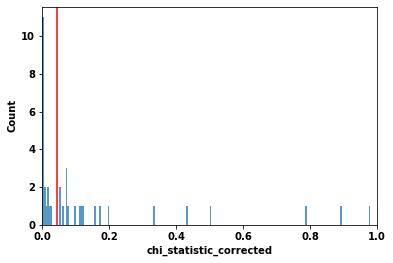

In [84]:

seqs_p_vals_df_large_n = seqs_p_vals_df[(seqs_p_vals_df["pos_expected"] >= 3)]
seqs_p_vals_df_large_n["chi_statistic_corrected"] = seqs_p_vals_df_large_n["chi_statistic"] / seqs_p_vals_df_large_n["n"]
seqs_p_vals_df_large_n["chi_statistic_corrected"]

sns.histplot(seqs_p_vals_df_large_n["chi_statistic_corrected"],binwidth = 0.005)
plt.axvline(x=0.045, color = "r")
plt.xlim(0, 1)



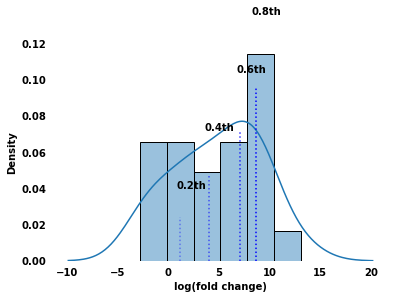

In [85]:
fig, ax = plt.subplots(figsize = (6,4))

mean_seqs_p_vals_df = seqs_p_vals_df_large_n.groupby(by = ["type","A115_DMSO", "seq_A", "seq_B", "Reference_Sequence", "Both_changes"]).mean().reset_index()
sns.histplot(mean_seqs_p_vals_df["dev"], stat = "density", alpha = 0.45)
sns.kdeplot(mean_seqs_p_vals_df["dev"])
ax.set_xlabel("log(fold change)")

ax.tick_params(left = False, bottom = False)
for ax2, spine in ax.spines.items():
    spine.set_visible(False)
ax.grid(False)

# quant_5, quant_25, quant_50, quant_75, quant_95 = avocado.quantile(0.05), avocado.quantile(0.25), avocado.quantile(0.5), avocado.quantile(0.75), avocado.quantile(0.95)

qunatiles = [0.2, 0.4, 0.6, 0.8]
for quantile in qunatiles:
    ax.axvline(np.quantile(mean_seqs_p_vals_df["dev"], quantile),
              alpha = quantile + 0.2, ymax = 1 * quantile, linestyle = ":", color = "blue")
    ax.text(np.quantile(mean_seqs_p_vals_df["dev"], quantile) - 0.4, 0.16 * quantile + 0.008,
           f"{quantile:.1}th")



In [88]:
np.sum(seqs_p_vals_df_large_n.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).min()["dev"] > 0)

12

In [89]:
dot = graphviz.Graph()

all_nodes_labels = {}

for i in range(seqs_p_vals_df_large_n_sig_count.shape[0]):
    seq_a = seqs_p_vals_df_large_n_sig_count.iloc[i]["seq_A"]
    seq_a_spaced = ""
    for j in range(4):
        seq_a_spaced += seq_a[j * 10:j * 10 + 10] +"\n"
    all_nodes_labels[seq_a] = seq_a_spaced
    
    seq_b = seqs_p_vals_df_large_n_sig_count.iloc[i]["seq_B"]
    seq_b_spaced = ""
    for j in range(4):
        seq_b_spaced += seq_b[j * 10:j * 10 + 10] +"\n"
    all_nodes_labels[seq_b] = seq_b_spaced
    
    


for node in all_nodes_labels.keys():
    dot.node(node, label = all_nodes_labels[node])
    

all_labels = {}
for i in range(seqs_p_vals_df_large_n_sig_count.shape[0]):
    seq_a = seqs_p_vals_df_large_n_sig_count.iloc[i]["seq_A"]
    seq_b = seqs_p_vals_df_large_n_sig_count.iloc[i]["seq_B"]
    cur_edge = sorted([seq_a, seq_b])
    cur_edge = cur_edge[0]+"\t"+cur_edge[1]
    
    cur_label = "%s, %s, %f" % (seqs_p_vals_df_large_n_sig_count.iloc[i]["type"], seqs_p_vals_df_large_n_sig_count.iloc[i]["A115_DMSO"], seqs_p_vals_df_large_n_sig_count.iloc[i]["dev"])
    
    if cur_edge in all_labels.keys():
        all_labels[cur_edge] = all_labels[cur_edge] + "\n" +cur_label
    else:
        all_labels[cur_edge] = cur_label
    
for edge in all_labels.keys():
    cur_edge = edge.split("\t")
    dot.edge(cur_edge[0], cur_edge[1], label = all_labels[edge])    
    
dot.render(view = True)


'Graph.gv.pdf'

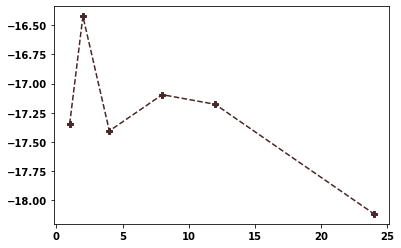

In [ ]:

colors = [[72/255,39/255, 40/255], [126/255,78/255, 96/255], [178/255,135/255, 163/255]]
for i in range(seqs_p_vals_df_large_n_sig_count.shape[0]):
    plt.figure()
    cur_data = seqs_p_vals_df_large_n_sig_count.iloc[i] 
    cur_ref = cur_data["Reference_Sequence"]
    cur_seq_A = cur_data["seq_A"]
    cur_seq_B = cur_data["seq_B"]
    cur_both = cur_data["Both_changes"]
    cur_type = cur_data["type"]
    cur_A115_DMSO = cur_data["A115_DMSO"]
    cur_FDR = cur_data["FDR"]
    cur_dev = cur_data["dev"]

    for j in range(1, 4):
        seq_a_abundance = all_reads_agg[(all_reads_agg["Aligned_Sequence"] == cur_seq_A) & (all_reads_agg["type"] == cur_type) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["iter"] == j)][times_to_test]
        seq_b_abundance = all_reads_agg[(all_reads_agg["Aligned_Sequence"] == cur_seq_B) & (all_reads_agg["type"] == cur_type) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["iter"] == j)][times_to_test]
        both_changes_abundance = all_reads_agg[(all_reads_agg["Aligned_Sequence"] == cur_both) & (all_reads_agg["type"] == cur_type) & (all_reads_agg["A115_DMSO"] == cur_A115_DMSO) & (all_reads_agg["iter"] == j)][times_to_test]
        if (seq_a_abundance.shape[0] > 0) & (seq_b_abundance.shape[0] > 0) & (both_changes_abundance.shape[0] > 0):
            expected = list(np.array(seq_a_abundance)[0] * np.array(seq_b_abundance)[0])
#             plt.plot(times_to_test, np.log10(expected), color = colors[j - 1], ls = "--", marker = "P", label = "%d, expected" % j)
#             plt.plot(times_to_test, np.log10(list(np.array(seq_a_abundance)[0])), color = colors[j - 1], marker = "s", label = "%d, observed" % j)
            plt.plot(times_to_test, np.log2(expected), color = colors[j - 1], ls = "--", marker = "P", label = "%d, expected" % j)
            plt.plot(times_to_test, np.log2(np.array(seq_a_abundance)[0]), color = colors[j - 1], marker = "s", label = "%d, observed" % j)
    plt.xticks(times_to_test, times_to_test)
    title = "Refe:%s\nseqA:%s\nseqB:%s\nBoth:%s\ntype:%s, A115\DMSO:%s" %(cur_ref, 
                                                                                          cur_seq_A, cur_seq_B, cur_both, 
                                                                                           cur_type, cur_A115_DMSO,
                                                                                          )
    plt.legend(loc='best', bbox_to_anchor=(0.85, 0., 0.5, 0.55), title = "Iteration")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Log abundance")
    plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 963


ValueError: object arrays are not supported

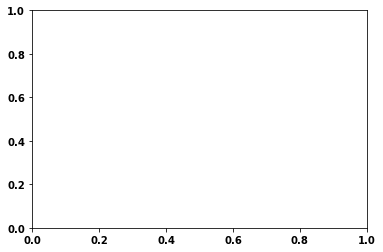

In [90]:
sns.kdeplot(seqs_p_vals_df[(seqs_p_vals_df["n"] >=3)]["pearson_r"])
plt.xlim(-1,1)
plt.style.use('ggplot')
plt.show()

## Distances

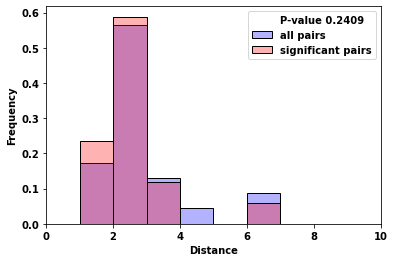

In [91]:
all_dist = seqs_p_vals_df[(seqs_p_vals_df["num_of_changes"] == 2) & (seqs_p_vals_df["pos_expected"] >= 3)]
all_dist = all_dist.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()["distance"]

sig_dist = seqs_p_vals_df_large_n_sig_count[seqs_p_vals_df_large_n_sig_count["num_of_changes"] == 2]["distance"]
# sns.kdeplot(all_dist, label = "all pairs")
# sns.kdeplot(sig_dist, label = "significant pairs")
sns.histplot(all_dist, bins=range(1, 30, 1), stat = "probability", label = "all pairs", color = "blue", alpha = 0.3)
sns.histplot(sig_dist, bins=range(1, 30, 1), stat = "probability", label = "significant pairs", color = "red", alpha = 0.3)

MW_p_val = scipy.stats.mannwhitneyu(all_dist, sig_dist, alternative = "greater")[1]
formatter = "{0:.4f}"


plt.plot([], [], ' ', label = 'P-value %s' % formatter.format(MW_p_val))
plt.legend()

plt.xlim(0, 10)
plt.ylabel("Frequency")
plt.xlabel("Distance")
plt.show()


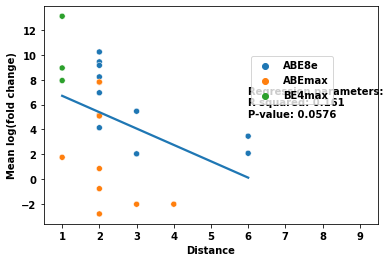

Editor: ABE8e, r^2: 0.477619, P-value: 0.026885
Editor: ABEmax, r^2: 0.169397, P-value: 0.237309
Editor: BE4max, r^2: nan, P-value: nan


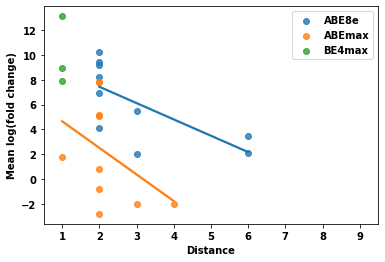

In [92]:
fig, ax = plt.subplots(figsize = (6,4))
all_dist = seqs_p_vals_df[(seqs_p_vals_df["num_of_changes"] == 2) & (seqs_p_vals_df["pos_expected"] >= 3)]
all_dist = all_dist.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()[["distance", "dev"]]
all_dist = all_dist.reset_index()
all_dist["Base Editor"] = [cur_type.split("_")[0] for cur_type in list(all_dist["type"])]

sns.regplot(x = "distance", y = "dev", data = all_dist, ci = None, scatter = False)
sns.scatterplot(x = "distance", y = "dev",hue = "Base Editor", data = all_dist)
ax.set_ylabel("Mean log(fold change)")
plt.xlim(0.5, 9.5)
r2_dist = stats.pearsonr(all_dist["distance"], all_dist["dev"])[0] **2
p_val_dist = stats.pearsonr(all_dist["distance"], all_dist["dev"])[1]

plt.annotate(f"Regression parameters:\nR squared: {r2_dist:.3}\nP-value: {p_val_dist:.3}", [6, 5])
plt.legend(loc = [0.62,0.55])
plt.xlabel("Distance")
plt.show()

for editor in ["ABE8e", "ABEmax", "BE4max"]:
    sns.regplot(x = "distance", y = "dev", data = all_dist[all_dist["Base Editor"] == editor], ci = None, 
                scatter = True, label = editor)
    ax.set_ylabel("Mean log(fold change)")
    plt.xlim(0.5, 9.5)
    cur_r = stats.pearsonr(all_dist[all_dist["Base Editor"] == editor]["distance"], all_dist[all_dist["Base Editor"] == editor]["dev"])[0] **2
    cur_p = stats.pearsonr(all_dist[all_dist["Base Editor"] == editor]["distance"], all_dist[all_dist["Base Editor"] == editor]["dev"])[1]
    print("Editor: %s, r^2: %f, P-value: %f" %(editor, cur_r, cur_p))
plt.ylabel("Mean log(fold change)")
plt.xlabel("Distance")
plt.legend()

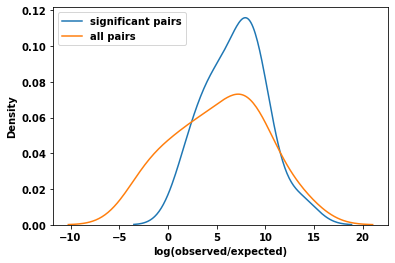

KeyError: 'pearson_r'

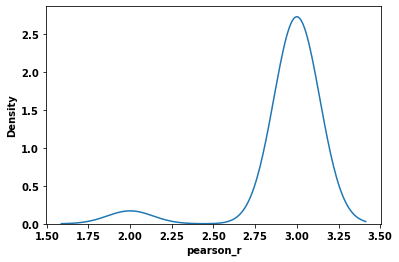

In [93]:
sns.kdeplot(seqs_p_vals_df_large_n_sig_count["dev"], label = "significant pairs")
sns.kdeplot(seqs_p_vals_df.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()["dev"], label = "all pairs")
MW_p_val = scipy.stats.mannwhitneyu(seqs_p_vals_df.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()["dev"], seqs_p_vals_df_large_n_sig_count["dev"])[1]
plt.xlabel("log(observed/expected)")

formatter = "{0:.4f}"


# plt.plot([], [], ' ', label = 'P-value %s' % formatter.format(MW_p_val))
plt.legend()

plt.show()

sns.kdeplot(seqs_p_vals_df_large_n_sig_count["pearson_r"], label = "significant pairs")
sns.kdeplot(seqs_p_vals_df.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()["pearson_r"])

MW_p_val = scipy.stats.mannwhitneyu(seqs_p_vals_df.groupby(by = ["type","A115_DMSO","seq_A","seq_B", "Reference_Sequence", "Both_changes"]).mean()["pearson_r"], seqs_p_vals_df_large_n_sig_count["pearson_r"])[1]
plt.plot([], [], ' ', label = 'P-value %s' % formatter.format(MW_p_val))
plt.legend()

plt.xlim(-1, 1)

4.921052631578948 5.931623931623932


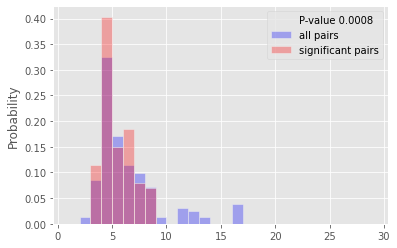

In [24]:
all_locs = []
for i in list(seqs_p_vals_df["changes_loc"]):
    [all_locs.append(j) for j in i]
sns.histplot(all_locs, bins=range(1, 30, 1), stat = "probability", label = "all pairs", color = "blue", alpha = 0.3)

sig_locs = []
for i in list(seqs_p_vals_df_large_n_sig_count["changes_loc"]):
    [sig_locs.append(j) for j in i]
    
sns.histplot(sig_locs, bins=range(1, 30, 1), stat = "probability", label = "significant pairs", color = "red", alpha = 0.3)

p_value_anova = stats.f_oneway(all_locs, sig_locs)[1]

plt.plot([], [], ' ', label = 'P-value %s' % formatter.format(p_value_anova))
plt.legend()
print(np.mean(sig_locs), np.mean(all_locs))